In [1]:
%cd ..
%load_ext autoreload
%autoreload 2


/home/teo/userdata/git_libraries/jgb-omr


In [2]:
import matplotlib.pyplot as plt
from exp_utils.jeonggan_synthesizer import JeongganSynthesizer, get_img_paths

class JeongganboPageDrawer:
  def __init__(self,
               page_width=8.27,
               page_height=11.69,
               page_left_margin=0.6,
               page_bottom_margin=0.5,
               dpi = 300):
    self.page_width = page_width
    self.page_height = page_height
    self.page_left_margin = page_left_margin
    self.page_bottom_margin = page_bottom_margin
    self.main_rect_width = 7
    self.main_rect_height = 10.5
    self.upper_margin_height = 1
    self.dpi = dpi
    note_img_path_dict = get_img_paths('test/synth/src', ['notes', 'symbols'])
    self.synth = JeongganSynthesizer(note_img_path_dict)
  

  def draw_blank_page(self,
                      num_gaks = 10,
                      num_jeonggans_per_gak = 20,
                      jg_width_ratio = 1.2):

    fig, ax = plt.subplots(figsize=(self.page_width, self.page_height), dpi=self.dpi)  # A4 paper size in inches
    # Set the limits of the plot
    ax.set_xlim(0, 8.27)
    ax.set_ylim(0, 11.69)

    rectangle_x = self.page_left_margin  # X-coordinate of the top-left corner of the rectangle
    rectangle_y = self.page_bottom_margin  # Y-coordinate of the top-left corner of the rectangle

    # Draw the rectangle
    rectangle = plt.Rectangle((rectangle_x, rectangle_y), self.main_rect_width, self.main_rect_height, edgecolor='black', facecolor='none')
    ax.add_patch(rectangle)

    # Draw upper margin block
    upper_margin_y = self.page_bottom_margin + self.main_rect_height - self.upper_margin_height

    upper_margin_block = plt.Rectangle((rectangle_x, upper_margin_y), self.main_rect_width, self.upper_margin_height, edgecolor='black', facecolor='none')
    ax.add_patch(upper_margin_block)


    # Draw Gaks
    gak_width = self.main_rect_width / (num_gaks * 2 + 1)
    gak_positions = [rectangle_x + gak_width * (2 * i + 1) for i in range(num_gaks)]
    for gak_x in gak_positions:
      # draw line from top margin_box to bottom of main rectangle
      ax.plot([gak_x, gak_x], [rectangle_y, rectangle_y + self.main_rect_height - self.upper_margin_height], color='black', linewidth=0.5)
      ax.plot([gak_x+gak_width * jg_width_ratio, gak_x+gak_width * jg_width_ratio], [rectangle_y, rectangle_y + self.main_rect_height - self.upper_margin_height], color='black', linewidth=0.5)

    # Draw Daegang line 
    jeonggan_height = (self.main_rect_height - self.upper_margin_height) / num_jeonggans_per_gak
    jeonggan_positions = [rectangle_y + jeonggan_height * i for i in range(num_jeonggans_per_gak)]

    for i, jeonggan_y in enumerate(reversed(jeonggan_positions)):
      for gak_x in gak_positions:
        ax.plot([gak_x, gak_x + gak_width*jg_width_ratio], [jeonggan_y, jeonggan_y], color='black', linewidth=0.5)
      if i in (5, 9, 13): # TODO: make this more general
        ax.plot([rectangle_x, rectangle_x + self.main_rect_width], [jeonggan_y, jeonggan_y], color='black', linewidth=1)
    
    jg_positions = [(gak_x, jeonggan_y) for gak_x in gak_positions for jeonggan_y in jeonggan_positions]
    jg_positions.sort(key=lambda x: (-x[0], -x[1] ))

    jg_width = gak_width * jg_width_ratio
    jg_height = jeonggan_height

    return fig, ax, jg_positions, (jg_width, jg_height)
  
  def draw_jeonggan(self, jeonggan_labels, ax, jg_positions, w_h_in_inches):
    assert len(jeonggan_labels) == len(jg_positions)
    w, h = w_h_in_inches
    for label, jg_position in zip(jeonggan_labels, jg_positions):
      if label == '0:5': continue
      jng_dict = self.synth.label2dict(label)
      img = self.synth.get_blank(width=int(w*self.dpi), height=int(h*self.dpi))
      jng_img = self.synth.generate_image_by_dict(img, jng_dict, apply_noise=False)
      ax.imshow(jng_img, extent=(jg_position[0], jg_position[0] + w, jg_position[1], jg_position[1] + h))
      
    return ax


with open('test/CHP_Orchestrationvanilla2.txt', 'r') as f:
  jg_text = f.read()

jg_by_part = jg_text.split('\n\n')
jg_by_part = [jg.split('\n') for jg in jg_by_part]
sample_gaks = jg_by_part[0][:10]
jgs = [jg for gak in sample_gaks for jg in gak.split('|')]

drawer = JeongganboPageDrawer()
fig, ax, jg_positions, w_h = drawer.draw_blank_page()
ax = drawer.draw_jeonggan(jgs, ax, jg_positions, w_h)

# save ax 
plt.savefig('test/jg_page/blank_page.png', dpi=300)
plt.close()
fig, ax, jg_positions, w_h = drawer.draw_blank_page()
sample_gaks = jg_by_part[0][10:20]
jgs = [jg for gak in sample_gaks for jg in gak.split('|')]
ax = drawer.draw_jeonggan(jgs, ax, jg_positions, w_h)
plt.savefig('test/jg_page/blank_page2.png', dpi=300)
plt.close()


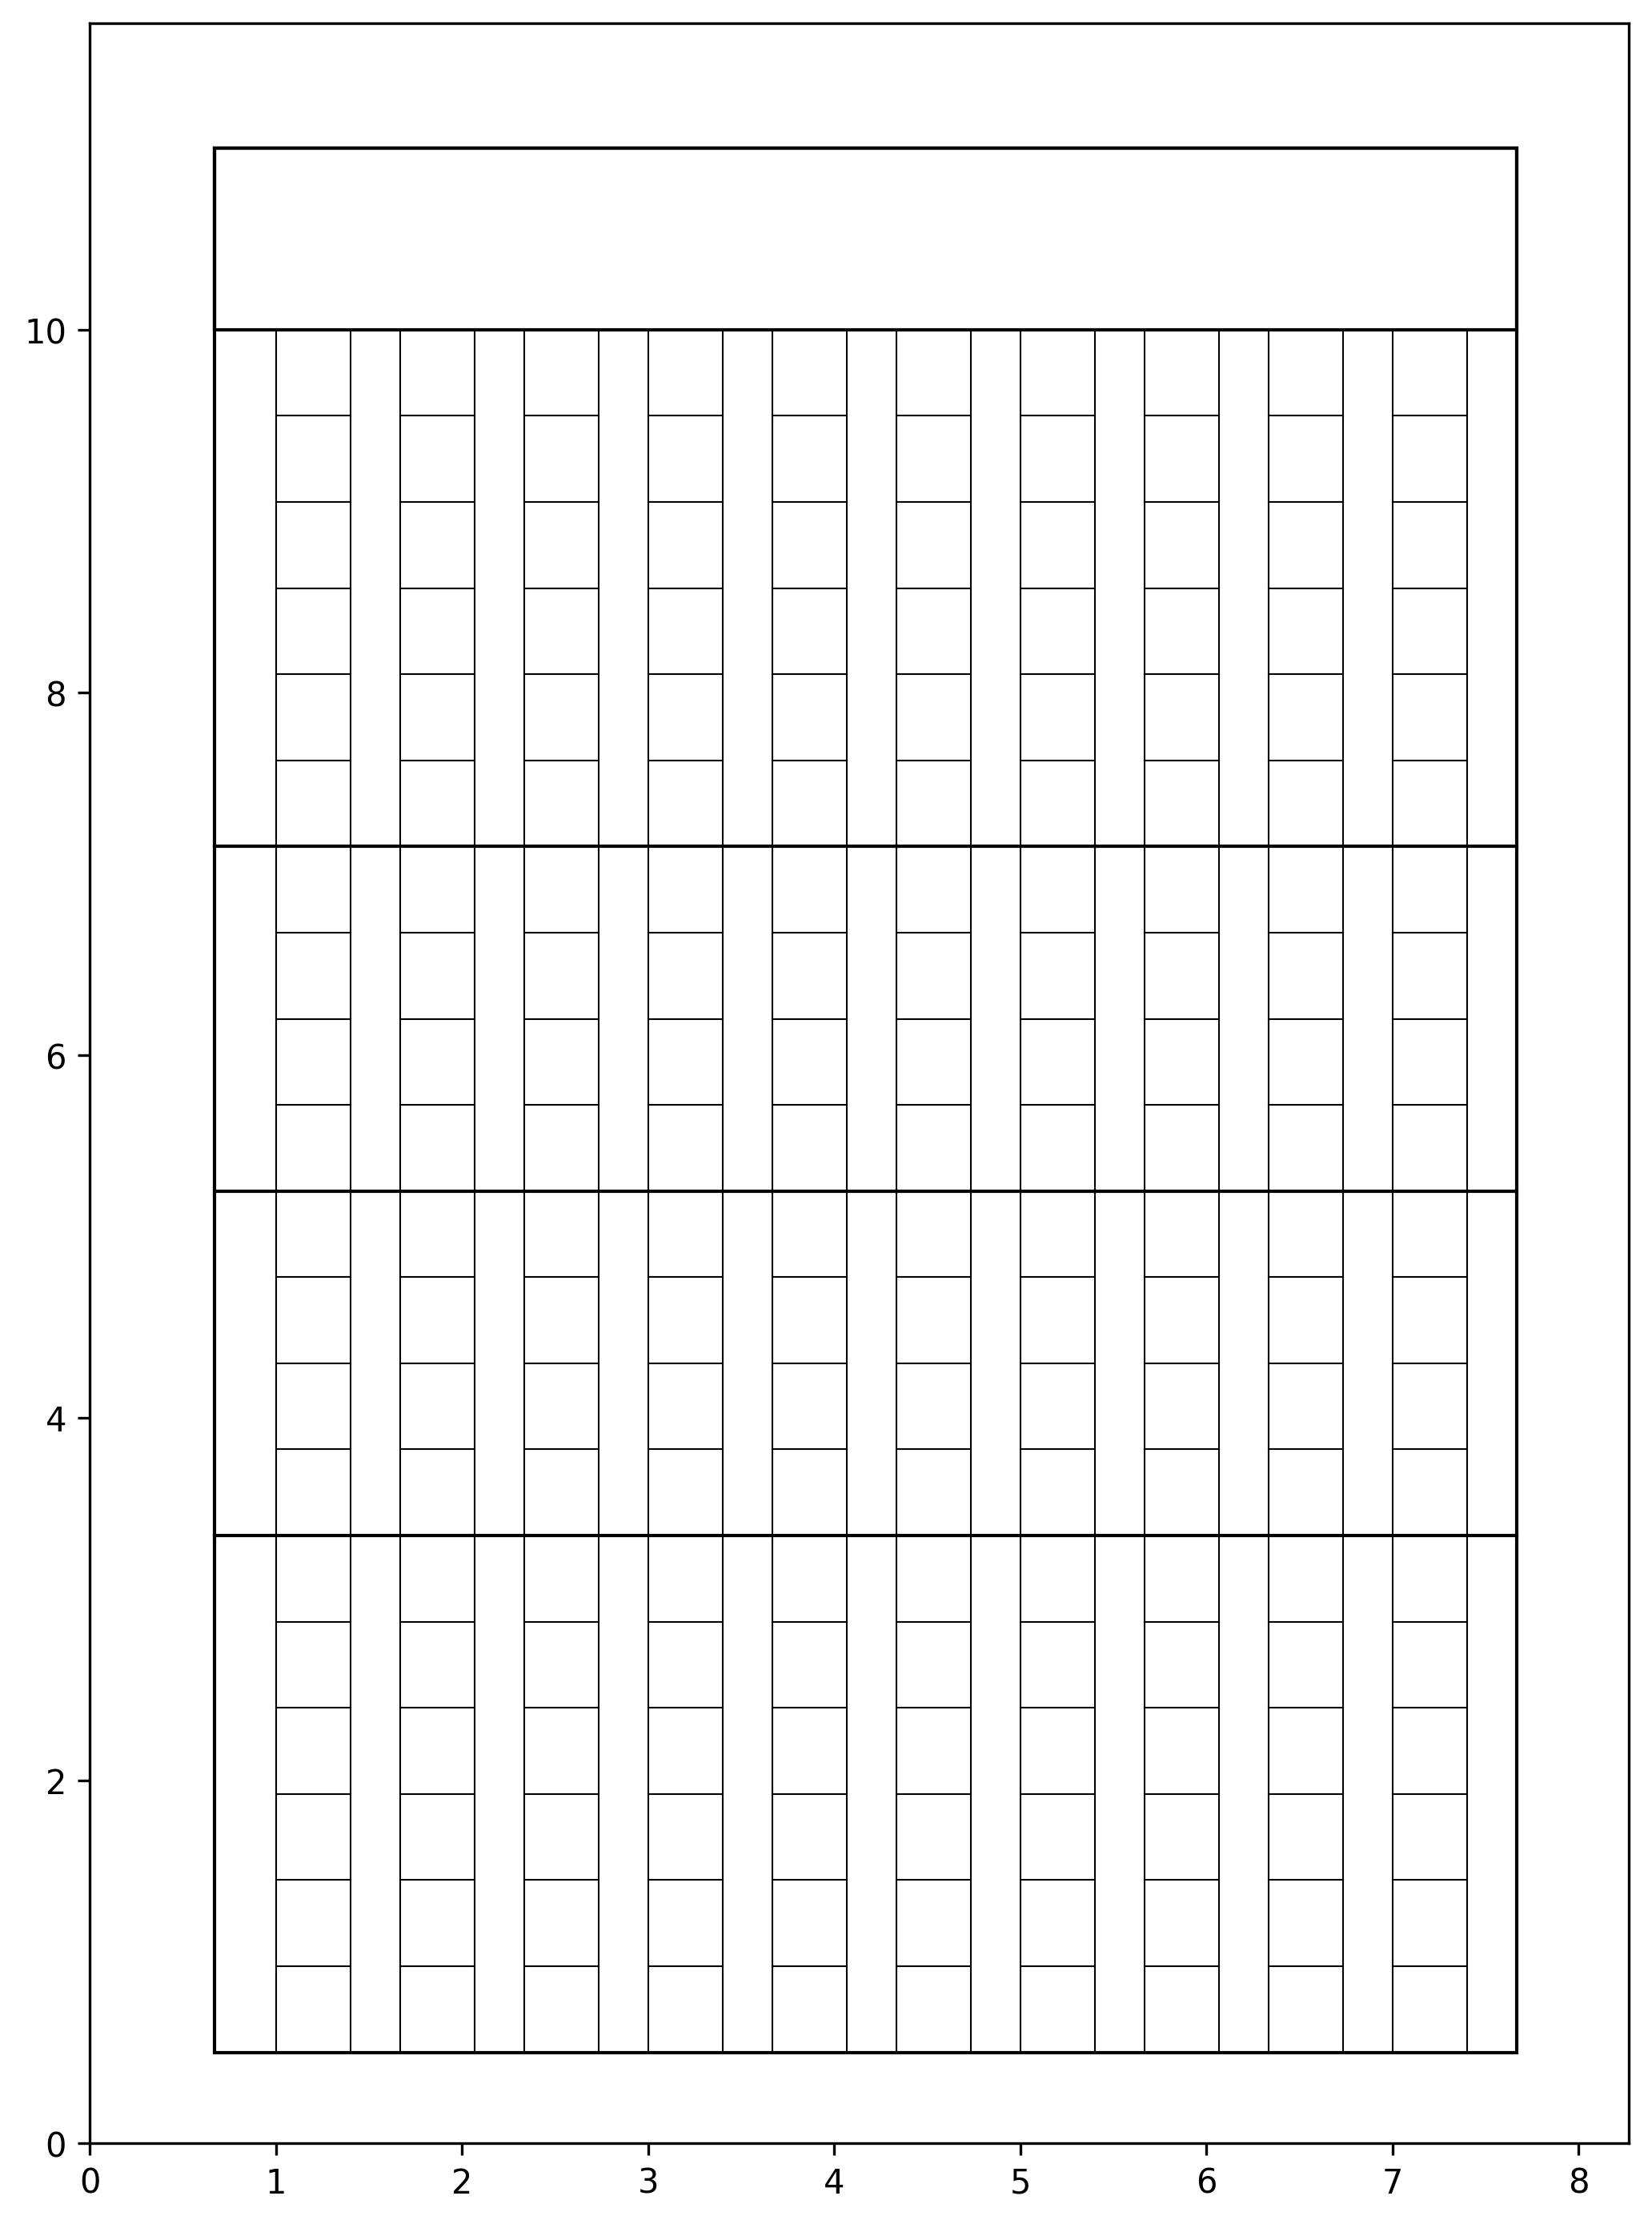

In [18]:
from exp_utils.jeonggan_drawer import JeongganboPageDrawer

drawer = JeongganboPageDrawer()
_ = drawer.draw_blank_page(num_gaks=10)

In [8]:
[jg.split(' ') for jg in jgs]

[['청태:5'],
 ['-:2', '청태:5', '청황:8'],
 ['청중:5'],
 ['-:2', '청중:5', '청태:8'],
 ['청임:5'],
 ['청중:2', '-:5', '청태:8'],
 ['청황:5'],
 ['청황:2', '-:5', '청태:8'],
 ['청중:2', '-:5', '청태:8'],
 ['청황:2', '-:4', '청태:6', '남:8'],
 ['청태:5'],
 ['-:2', '청태:5', '청황:8'],
 ['청중:5'],
 ['청태:2', '-:4', '청황:6', '청중:8'],
 ['청황:2', '-:5', '청태:8'],
 ['청황:2', '-:4', '청태:6', '남:8'],
 ['청태:5'],
 ['-:2', '청태:4', '청황:6', '청중:8'],
 ['청황:2', '-:5', '청태:8'],
 ['청태:2', '-:5', '청황:8'],
 ['청중:5'],
 ['남:5'],
 ['청황:5'],
 ['청중:2', '남:5', '-:8'],
 ['남:5'],
 ['무:5'],
 ['청황:5'],
 ['0:5'],
 ['청황:5'],
 ['남:2', '남:5', '-:8'],
 ['청태:5'],
 ['-:2', '청태:5', '청태:8'],
 ['청황:2', '-:5', '청태:8'],
 ['청황:10', '청태:11'],
 ['남:5'],
 ['0:5'],
 ['임:5'],
 ['중:2', '태:5', '중:8'],
 ['남:2', '-:5', '남:8'],
 ['임:2', '-:5', '남:8'],
 ['청태:5'],
 ['0:5'],
 ['0:5'],
 ['0:5'],
 ['남:5'],
 ['0:5'],
 ['임:2', '-:4', '무:6', '남:7', '임:9'],
 ['중:2', '태:5', '-:8'],
 ['남:2', '-:5', '임:8'],
 ['청황:2', '-:4', '청태:6', '청황:8'],
 ['임:5'],
 ['0:5'],
 ['-:2', '-:5', '임:8'],
 ['-:2', '-

In [9]:
jg_samples

['청황:2 -:5 청태:8',
 '청황:10 청태:11',
 '남:2 -:5 남:8',
 '임:2 -:5 남:8',
 '청태:5',
 '-:2 청태:4 청황:6 청중:8',
 '청황:2 -:5 청태:8',
 '청황:2 -:4 청태:6 남:8',
 '청태:2 -:5 청태:7 남:9',
 '청태:2 -:4 청황:6 청중:8',
 '청임:2 청남:5 -:7 청임:9',
 '청중:5',
 '청중:5',
 '-:2 청중:5 청태:8',
 '청태:2 -:5 청태:7 청황:9',
 '청중:2 -:5 청태:8',
 '청황:2 -:5 청태:8',
 '청황:2 -:4 청중:6 청태:7 청황:9',
 '남:5',
 '-:2 남:5 임:8']

NameError: name 'jg_samples' is not defined

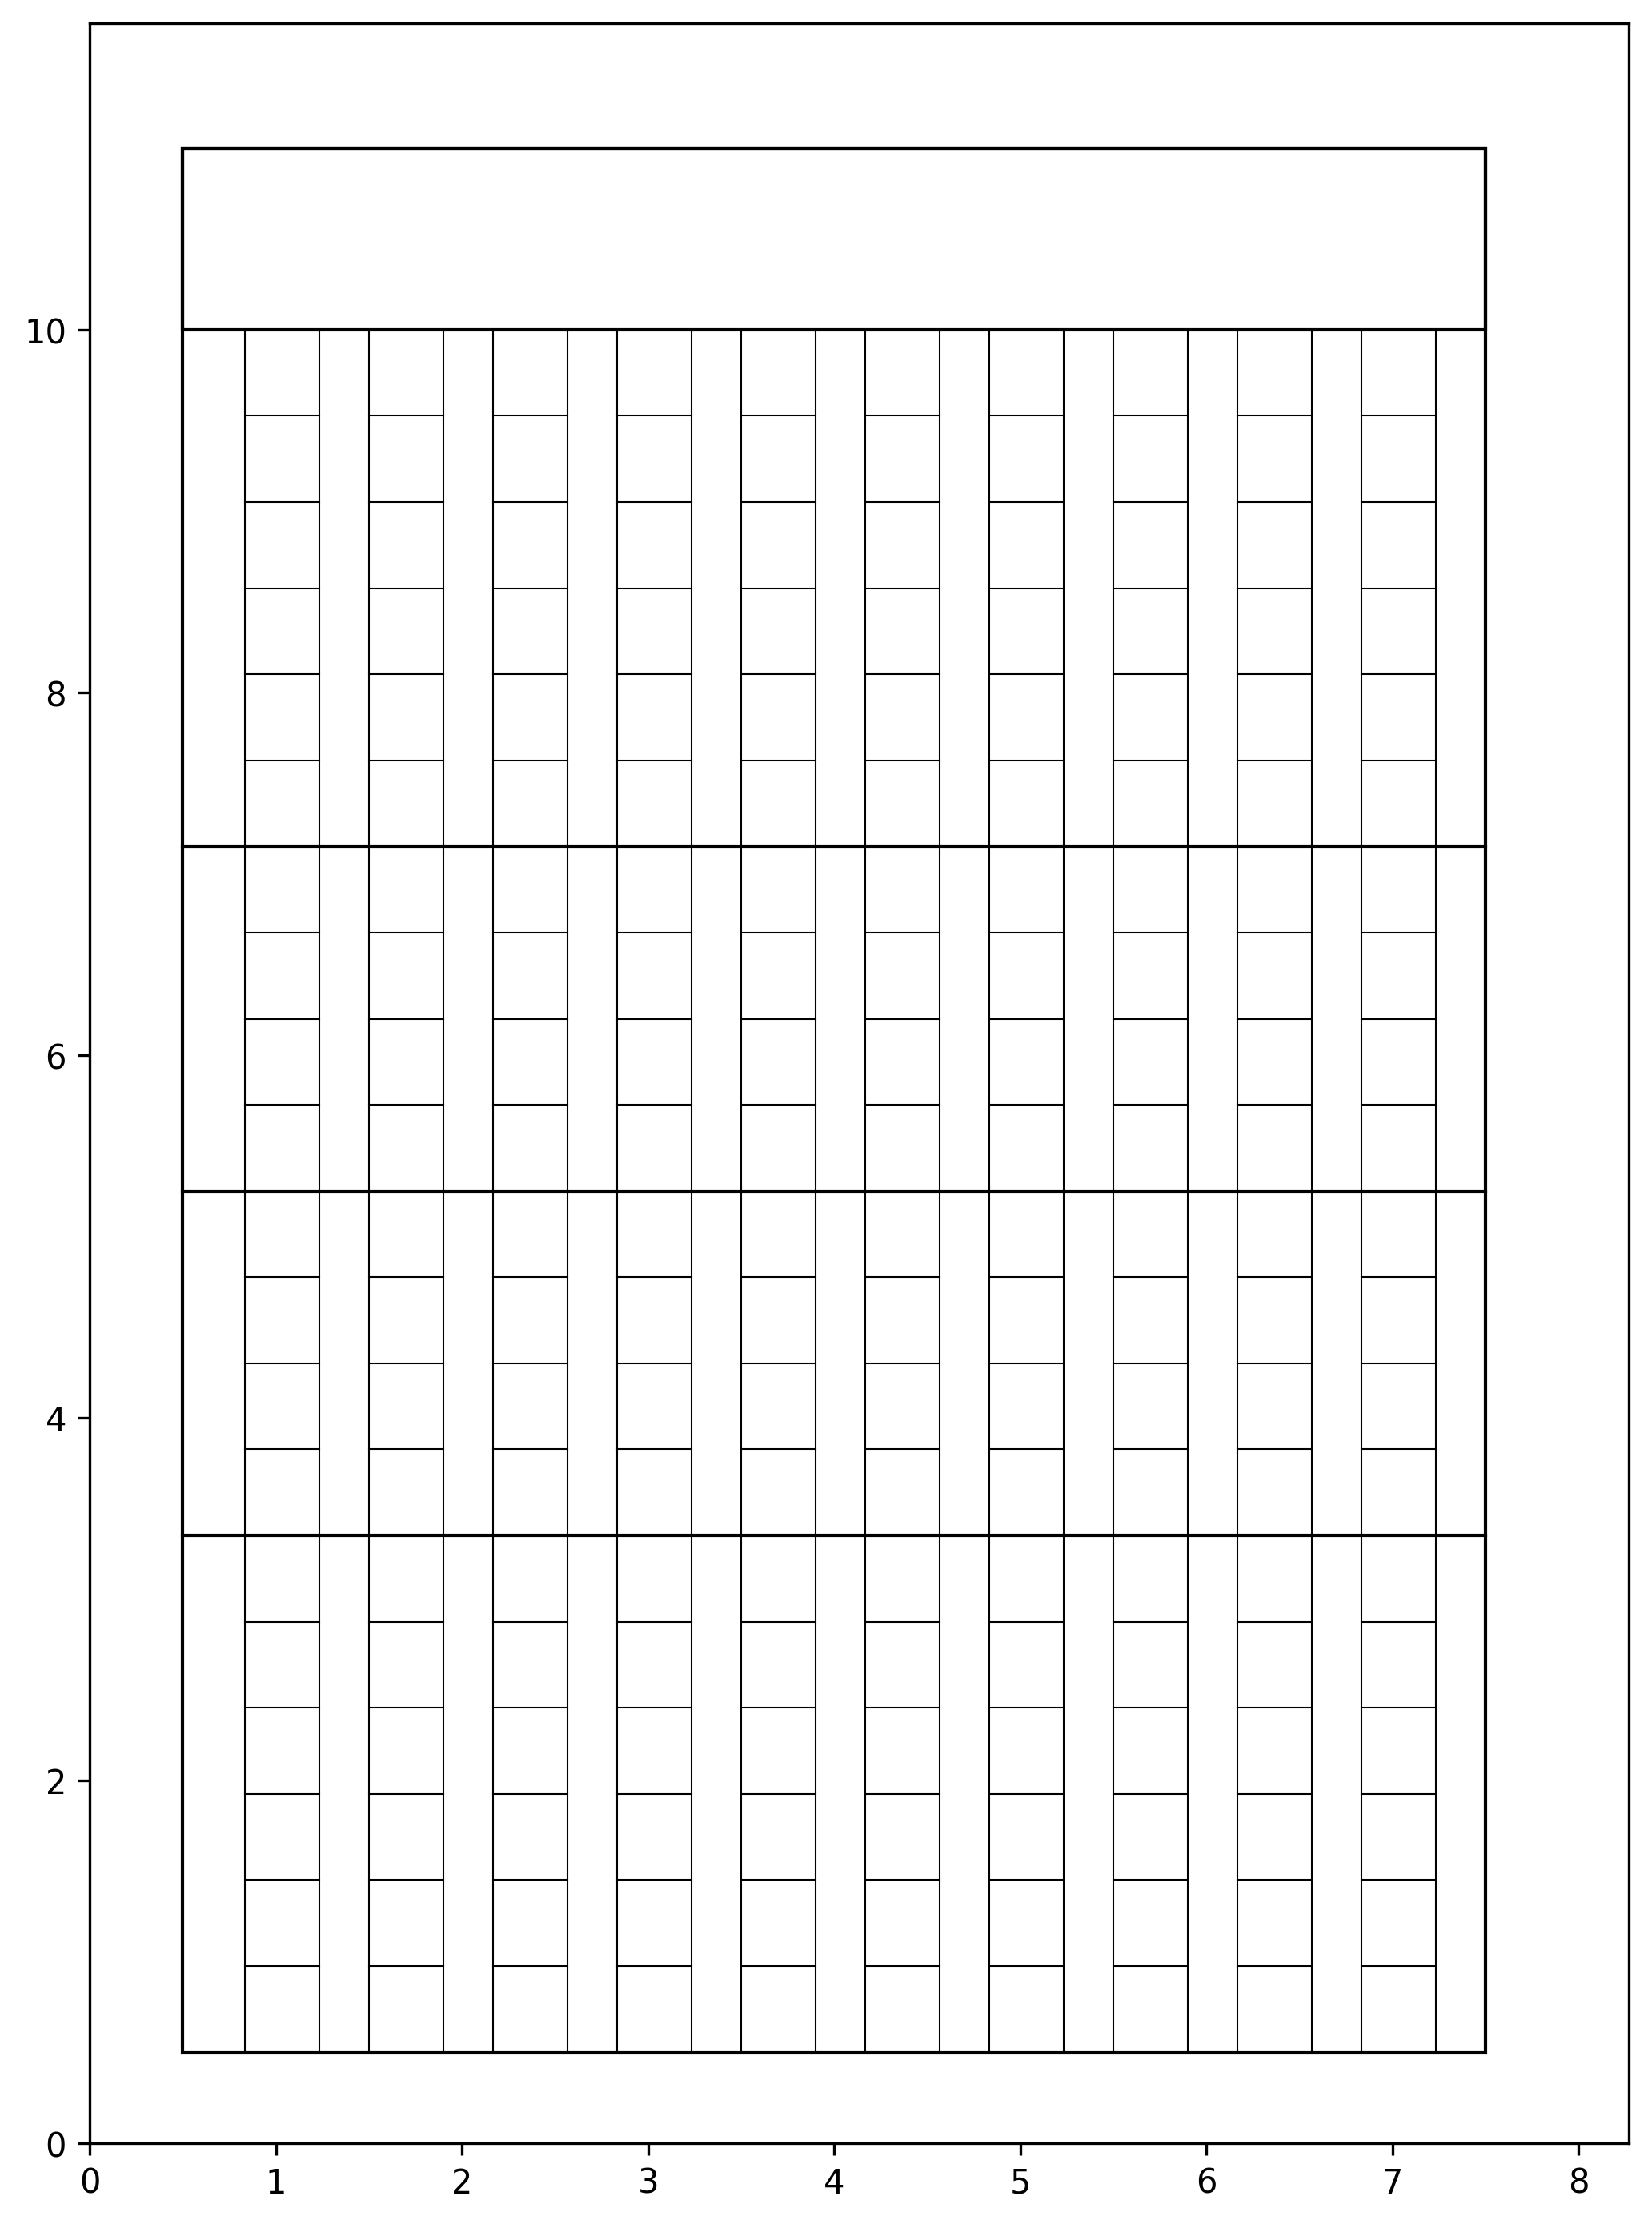

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
page_width = 8.27
page_height = 11.69
page_left_margin = 0.5  # Left margin of the page
page_bottom_margin = 0.5  # Bottom margin of the page
num_gaks = 10
num_jeonggans_per_gak = 20 
jg_width_ratio = 1.2

fig, ax = plt.subplots(figsize=(page_width, page_height), dpi=300)  # A4 paper size in inches

# Set the limits of the plot
ax.set_xlim(0, 8.27)
ax.set_ylim(0, 11.69)

# Calculate the coordinates of the rectangle
rectangle_width = 7  # Width of the rectangle
rectangle_height = 10.5  # Height of the rectangle

rectangle_x = page_left_margin  # X-coordinate of the top-left corner of the rectangle
rectangle_y = page_bottom_margin  # Y-coordinate of the top-left corner of the rectangle

# Draw the rectangle
rectangle = plt.Rectangle((rectangle_x, rectangle_y), rectangle_width, rectangle_height, edgecolor='black', facecolor='none')
ax.add_patch(rectangle)

# Draw upper margin block
upper_margin_height = 1
upper_margin_y = page_bottom_margin + rectangle_height - upper_margin_height
upper_margin_width = rectangle_width

upper_margin_block = plt.Rectangle((rectangle_x, upper_margin_y), upper_margin_width, upper_margin_height, edgecolor='black', facecolor='none')
ax.add_patch(upper_margin_block)


# Draw Gaks
gak_width = rectangle_width / (num_gaks * 2 + 1)
gak_positions = [rectangle_x + gak_width * (2 * i + 1) for i in range(num_gaks)]
for gak_x in gak_positions:
  # draw line from top margin_box to bottom of main rectangle
  ax.plot([gak_x, gak_x], [rectangle_y, rectangle_y + rectangle_height - upper_margin_height], color='black', linewidth=0.5)
  ax.plot([gak_x+gak_width * jg_width_ratio, gak_x+gak_width * jg_width_ratio], [rectangle_y, rectangle_y + rectangle_height - upper_margin_height], color='black', linewidth=0.5)

# Draw Daegang line 
jeonggan_height = (rectangle_height - upper_margin_height) / num_jeonggans_per_gak
jeonggan_positions = [rectangle_y + jeonggan_height * i for i in range(num_jeonggans_per_gak)]

for i, jeonggan_y in enumerate(reversed(jeonggan_positions)):
  for gak_x in gak_positions:
    ax.plot([gak_x, gak_x + gak_width*jg_width_ratio], [jeonggan_y, jeonggan_y], color='black', linewidth=0.5)
  if i in (5, 9, 13):
    ax.plot([rectangle_x, rectangle_x + rectangle_width], [jeonggan_y, jeonggan_y], color='black', linewidth=1)


jg_positions = [(gak_x, jeonggan_y) for gak_x in gak_positions for jeonggan_y in jeonggan_positions]
jg_positions.sort(key=lambda x: (-x[0], -x[1] ))

label = jg_samples[0]
jng_dict = synth.label2dict(label)
img = synth.get_blank(width=120, height=142)
jng_img:np.ndarray = synth.generate_image_by_dict(img, jng_dict, apply_noise=False)

# draw jng_mg in ax
ax.imshow(jng_img, extent=(jg_positions[0][0], jg_positions[0][0] + gak_width*jg_width_ratio, jg_positions[0][1], jg_positions[0][1] + jeonggan_height))

# Display the plot
# plt.show()


In [ ]:
jg_positions

[(6.833333333333333, 9.525),
 (6.833333333333333, 9.049999999999999),
 (6.833333333333333, 8.575),
 (6.833333333333333, 8.1),
 (6.833333333333333, 7.625),
 (6.833333333333333, 7.1499999999999995),
 (6.833333333333333, 6.675),
 (6.833333333333333, 6.199999999999999),
 (6.833333333333333, 5.725),
 (6.833333333333333, 5.25),
 (6.833333333333333, 4.7749999999999995),
 (6.833333333333333, 4.3),
 (6.833333333333333, 3.8249999999999997),
 (6.833333333333333, 3.3499999999999996),
 (6.833333333333333, 2.875),
 (6.833333333333333, 2.4),
 (6.833333333333333, 1.9249999999999998),
 (6.833333333333333, 1.45),
 (6.833333333333333, 0.975),
 (6.833333333333333, 0.5),
 (6.166666666666666, 9.525),
 (6.166666666666666, 9.049999999999999),
 (6.166666666666666, 8.575),
 (6.166666666666666, 8.1),
 (6.166666666666666, 7.625),
 (6.166666666666666, 7.1499999999999995),
 (6.166666666666666, 6.675),
 (6.166666666666666, 6.199999999999999),
 (6.166666666666666, 5.725),
 (6.166666666666666, 5.25),
 (6.1666666666666

In [4]:
with open('test/CHP_Orchestrationvanilla2.txt', 'r') as f:
  jg_text = f.read()

jg_by_part = jg_text.split('\n\n')
jg_by_part = [jg.split('\n') for jg in jg_by_part]
sample_gak = jg_by_part[0][0]
jg_samples = sample_gak.split('|')



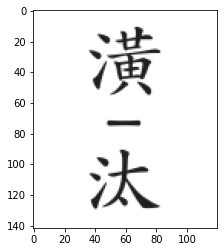

In [68]:
from exp_utils.jeonggan_synthesizer import JeongganSynthesizer
from omr_cnn import get_img_paths

note_img_path_dict = get_img_paths('test/synth/src', ['notes', 'symbols'])
synth = JeongganSynthesizer(note_img_path_dict)

label = jg_samples[0]
jng_dict = synth.label2dict(label)
img = synth.get_blank(width=120, height=142)
jng_img = synth.generate_image_by_dict(img, jng_dict, apply_noise=False)

# synth_result = synth.generate_image_by_label(jg_samples[0], width=120, height=142)

plt.imshow(jng_img)

In [7]:
0.4 * 300, 0.475 * 300

(120.0, 142.5)

In [5]:
gak_width * jg_width_ratio, jeonggan_height

(0.39999999999999997, 0.475)

In [34]:
jeonggan_positions

[1.5,
 1.975,
 2.45,
 2.925,
 3.4,
 3.875,
 4.35,
 4.824999999999999,
 5.3,
 5.7749999999999995,
 6.25,
 6.725,
 7.199999999999999,
 7.675,
 8.149999999999999,
 8.625,
 9.1,
 9.575,
 10.049999999999999,
 10.525]